In [6]:
import graph_tool.all as gt
import random
import numpy as np
import cloudpickle as pickle

In [200]:
%load_ext autoreload
%autoreload 2
from trisbm import trisbm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [257]:
with open("trisbm/model.pkl", "rb") as file:
    model = pickle.load(file)

In [260]:
import pandas as pd
df = pd.DataFrame(index = ["ENSG1","ENSG2","ENSG3","ENSG4","ENSG5", "mi1","mi2","mi3", "mi4","mi5","mi6"], 
                  columns=["doc%d"%i for i in range(50)], 
                  data = np.random.randint(0, 5, size=11*50).reshape((11,50)))
for doc in df.columns[:10]:
    df[doc] = np.concatenate([np.random.randint(0, 5, 3),np.random.randint(50, 100, 2), np.random.randint(50, 200, 3), np.random.randint(50, 200, 3)])

for doc in df.columns[10:20]:
    df[doc] = np.concatenate([np.random.randint(50, 100, 3),np.random.randint(0, 1, 2), np.random.randint(50, 200, 3), np.random.randint(1, 2, 3)])

for doc in df.columns[20:]:
    df[doc] = np.concatenate([np.random.randint(50, 100, 3),np.random.randint(50, 100, 2), np.random.randint(1, 2, 3), np.random.randint(50, 200, 3)])


df

,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,...,doc40,doc41,doc42,doc43,doc44,doc45,doc46,doc47,doc48,doc49
ENSG1,4,1,2,3,1,3,0,4,1,3,...,55,97,78,91,61,65,75,92,90,72
ENSG2,0,2,1,1,2,3,0,3,0,4,...,99,89,98,84,92,98,96,74,90,94
ENSG3,4,3,0,3,0,3,2,3,4,0,...,84,65,86,84,68,51,95,67,53,62
ENSG4,91,82,71,77,92,52,95,87,95,71,...,98,85,63,81,92,81,53,95,63,96
ENSG5,50,56,90,77,84,76,87,63,90,77,...,68,96,67,88,70,99,80,82,80,52
mi1,192,162,159,117,123,146,85,58,69,63,...,1,1,1,1,1,1,1,1,1,1
mi2,170,86,101,137,52,120,86,107,90,136,...,1,1,1,1,1,1,1,1,1,1
mi3,155,192,59,181,114,172,62,158,86,140,...,1,1,1,1,1,1,1,1,1,1
mi4,56,185,96,174,102,78,131,133,149,197,...,170,128,173,137,168,98,97,160,76,147
mi5,183,174,83,183,159,181,86,133,146,191,...,126,93,63,117,76,75,135,58,64,75


<Graph object, undirected, with 61 vertices and 523 edges, 2 internal vertex properties, 1 internal edge property, at 0x7ff1b2a63700>
None


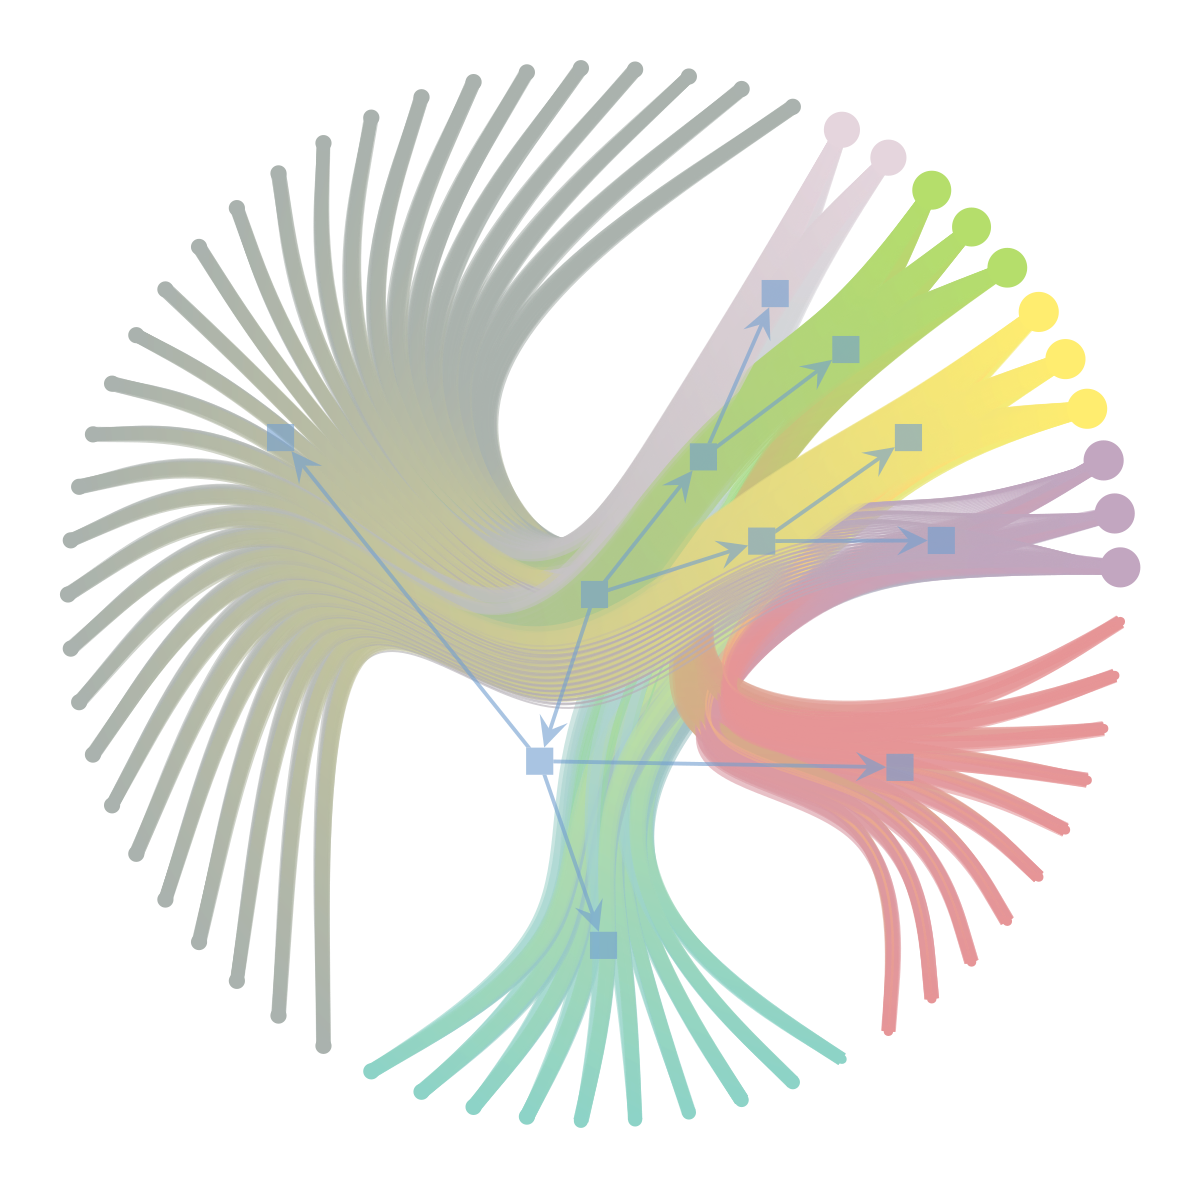

In [274]:
model = trisbm()
model.make_graph(df, get_kind=lambda w: 1 if "ENSG" in w else 2)
g=model.g
print(g)
print(g.vp["name"].a)
model.fit(verbose=False)
model.draw()

In [275]:
model.save_graph("graph.xml.gz")

In [254]:
#model.draw(hedge_pen_width=8, hvertex_size=25, output="network.pdf")

In [265]:
model.metadata(n=-1)

{0: [('mi1', 0.3375010044012229),
  ('mi3', 0.3371463853386321),
  ('mi2', 0.325352610260145)],
 1: [('mi4', 0.3380722618639076),
  ('mi5', 0.33451999872872623),
  ('mi6', 0.3274077394073662)]}

Saving level 0


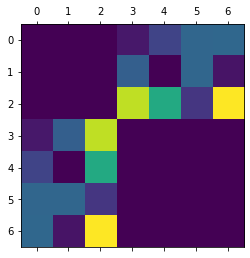

In [266]:
!rm -f *.csv *.tsv
model.save_data()

In [194]:
model.metadatumdist(0)

[(0, 1.0)]

In [59]:
np.unique(g.vp["kind"].a)

PropertyArray([0, 2], dtype=int32)

In [60]:
np.array(list(g.vertices()))[g.vp["kind"].a==2]

array([<Vertex object with index '790' at 0x7ff1be6a6570>,
       <Vertex object with index '791' at 0x7ff1be6a65d0>,
       <Vertex object with index '792' at 0x7ff1be6a6630>,
       <Vertex object with index '793' at 0x7ff1be6a6690>,
       <Vertex object with index '794' at 0x7ff1be6a66f0>,
       <Vertex object with index '795' at 0x7ff1be6a6750>,
       <Vertex object with index '796' at 0x7ff1be6a67b0>,
       <Vertex object with index '797' at 0x7ff1be6a6810>,
       <Vertex object with index '798' at 0x7ff1be6a6870>,
       <Vertex object with index '799' at 0x7ff1be6a68d0>,
       <Vertex object with index '800' at 0x7ff1be6a6930>,
       <Vertex object with index '801' at 0x7ff1be6a6990>,
       <Vertex object with index '802' at 0x7ff1be6a69f0>,
       <Vertex object with index '803' at 0x7ff1be6a6a50>,
       <Vertex object with index '804' at 0x7ff1be6a6ab0>,
       <Vertex object with index '805' at 0x7ff1be6a6b10>,
       <Vertex object with index '806' at 0x7ff1be6a6b70